In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the 'Universal Bank' data

CustChurn = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Universalbank.csv", header=0)
CustChurn.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Check if there are duplicate rows in the dataset

CustChurn.duplicated().any()

False

In [5]:
# Load the 'Universal Bank' data

Bankdata = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Universalbank.csv", header=0)
Bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
#display the shape of the dataset(no of records, variables)
Bankdata.shape

(5000, 14)

In [7]:
Bankdata_bk = Bankdata.copy()

In [8]:
#deleteing unncessary columns
del Bankdata['ID']
del Bankdata['ZIP Code']

In [9]:
#identifying independent and target variables
IndepVar = []
for col in Bankdata.columns:
    if col != 'CreditCard':
        IndepVar.append(col)

TargetVar = 'CreditCard'

x = Bankdata[IndepVar]
y = Bankdata[TargetVar]

In [10]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42) 

In [11]:
# Feature Scaling - Each independent variable is in different range. The process of transforming all the 
# features in the given data set to a fixed range is known as ‘Scaling’

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Confusion matrix : 
 [[167 260]
 [298 775]]
Outcome values : 
 167 260 298 775
Classification report : 
               precision    recall  f1-score   support

           1       0.36      0.39      0.37       427
           0       0.75      0.72      0.74      1073

    accuracy                           0.63      1500
   macro avg       0.55      0.56      0.55      1500
weighted avg       0.64      0.63      0.63      1500

Accuracy : 62.8 %
Precision : 35.9 %
Recall : 39.1 %
F1 Score : 0.374
Specificity or True Negative Rate : 72.2 %
Balanced Accuracy : 55.6 %
MCC : 0.111
roc_auc_score: 0.557


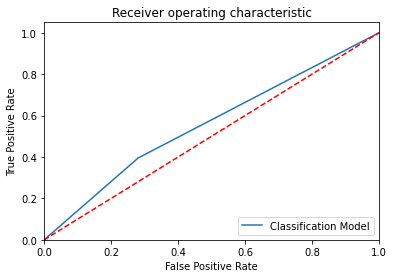

-----------------------------------------------------------------------------------------------------


In [14]:
# To build the 'Multinominal Decision Tree' model with random sampling

from sklearn.tree import DecisionTreeClassifier 

BankdataDT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                                     min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                     random_state=None, max_leaf_nodes=None, 
                                     min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

# Train the model with train data 

BankdataDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = BankdataDT.predict(x_test)
y_pred_prob = BankdataDT.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,BankdataDT.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

Feature: 0, Score: 0.12916
Feature: 1, Score: 0.12707
Feature: 2, Score: 0.27744
Feature: 3, Score: 0.04651
Feature: 4, Score: 0.11646
Feature: 5, Score: 0.04249
Feature: 6, Score: 0.09877
Feature: 7, Score: 0.01529
Feature: 8, Score: 0.01164
Feature: 9, Score: 0.07789
Feature: 10, Score: 0.05727


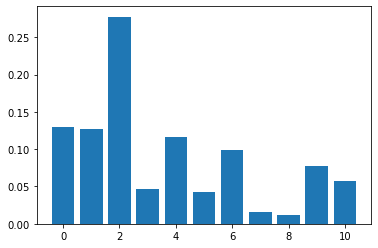

In [15]:
# To get feature importance

from matplotlib import pyplot

importance =BankdataDT.feature_importances_

# Summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [16]:
Bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [17]:
# Results

PredResults = pd.DataFrame({'CreditCard_A':y_test, 'CreditCard_P':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = Bankdata_bk.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CreditCard_A,CreditCard_P
2949,2950,37,11,19,95054,3,0.2,2,0,0,0,0,1,0,0,0
325,326,54,28,89,95039,1,1.9,2,0,0,0,0,1,1,1,0
4667,4668,52,28,72,94720,1,1.6,3,0,0,0,0,1,0,0,1
1209,1210,46,21,52,91304,3,2.7,2,228,0,0,0,0,1,1,0
879,880,63,37,84,91768,4,1.9,2,0,0,0,0,1,0,0,0
4613,4614,63,38,52,91361,4,1.7,1,218,0,0,0,1,1,1,0
2238,2239,48,22,35,92709,1,1.4,3,0,0,0,0,1,0,0,0
3501,3502,65,39,105,91380,4,1.7,3,0,0,1,0,1,0,0,0
4729,4730,40,14,18,90049,4,1.5,3,0,0,0,0,0,0,0,1
3338,3339,35,9,43,92037,4,1.2,2,0,0,1,0,1,0,0,0


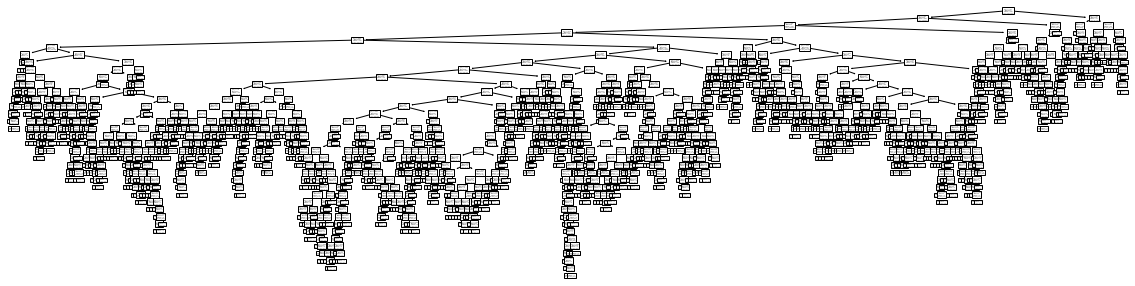

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,5))
tree.plot_tree(BankdataDT);